In [82]:
using LinearAlgebra
using Plots

include("Cholesky.jl")
include("Algoritmo LU.jl")

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


LUPP (generic function with 1 method)

# ANÁLISIS NUMÉRICO
# TAREA 2
# Diego López Zanella


# PROBLEMA 1



Dados los siguientes vectores:
$$\alpha = \begin{pmatrix} 4 \\ 3  \end{pmatrix}, \;\; \beta = \begin{pmatrix} 2 \\ 1 \\ 2  \end{pmatrix}$$

encuentre la matriz de rotación $G$ y el reflector de Householder $F$ tales que 

$$G \alpha = \begin{pmatrix} 5 \\ 0  \end{pmatrix}, \;\; F \beta = \begin{pmatrix} -3 \\ 0 \\ 0  \end{pmatrix}$$


In [13]:
#Problema 2

A = [4 10; 3 0]
x = [4;3];
v = norm(x).*[1;0]-x
H = I-2* ( (v*v')./(v'*v) )
H*A
H

2×2 Matrix{Float64}:
 0.8   0.6
 0.6  -0.8

# Problema 3

El siguiente problema consiste en determinar la curva de crecimiento de una población de bacterias. Los datos a utilizar son: el número de individuos de una especia particular de bacterias $(y_i)$ en el tiempo $(t_i)$.

\begin{align}
        t & = [0,4,7.5,25,31,48.75,52,58.5,72.7,78,95,96,108,112,133,136.75,143,156.5,166.7,181] \\
        y & = [8,6,6,7,8,10,13,18,33,38,76,78,164,175,280,300,320,405,385,450].
    \end{align}

# Recordatorio de qué son las ecuaciones normales

Tenemos como datos el vector $t$ y el vector $y$. Buscamos un vector de parámetros $c = (c_0, \dots , c_n)$ tal que si
    \begin{align}
        \phi (t) = c_0 +c_1 t+c_2t^2 + \cdots + c_n t^n
    \end{align}
entonces $\phi(t_i)=y_i$; es decir,
    \begin{align}
        A c = y
    \end{align}
donde $A$ es la matriz de diseño $A = \left( t_i^j \right)_{ij}$. Es posible que $y$ no esté en el rango de $A$, por lo que el problema podría no tener solución. Por tanto, buscamos una solución aproximada mediante el método de mínimos cuadrados. Se demuestra que el vector de parámetros $c$ que minimiza la distancia
    \begin{align}
        \left| \left| Ac - y \right| \right|
     \end{align}
es solución del sistema de ecuaciones normales:
    \begin{align}
        A^T A c = A^T y.
    \end{align}
Cuando la matriz $A$ tiene rango completo, $A^T A $ es una matriz definida positiva, por lo que podemos calcular su factorización de Cholesky: $A^T A = L L^T$. Por lo tanto, las ecuaciones normales se pueden resolver de la siguiente forma:

1 Encontramos una solución $w_0$ a la ecuación $Lw  = A^Ty$. Como $L$ es triangular inferior, podemos resolver este sistema mediante sustitución hacia adelante.

2 Encontramos una solución $c_0$ a la ecuación $L^T c = w_0$. Como $L^T$ es triangular superior, este sistema lo resolvemos mediante sustitución hacia adelante.

De esta forma,
    \begin{align}
        A^T A c_0 & = L L^T c_0 \\
        & = L w_0 \\
        & = A^T y.
    \end{align}
    
 Una vez encontrado el vector de parámetros $c_0$, ya podemos proponer el siguiente modelo para las observaciones $(t_i,y_i)$:
     \begin{align}
         \phi(t) = c^T \begin{pmatrix} 1 \\ t \\ \vdots \\ t^n
         \end{pmatrix}
     \end{align}

1 Realice un programa que calcule el polinomio de ajuste de grado $n$ (con $n$ dada por el usuario) mediante el método de Ecuaciones normales.

In [37]:
#Datos dados. y_i es el número de individuos en el tiempo t_i.
t = [0 ; 4; 7.5; 25; 31; 48.75; 52 ; 58.5; 72.7; 78; 95; 96; 108; 112; 133; 136.75; 143; 156.5; 166.7;181];
y = [8; 6; 6; 7; 8; 10; 13; 18; 33; 38; 76; 78; 164; 175; 280; 300; 320; 405; 385; 450];

In [62]:
#Esta función toma como argumentos un vector de parámetros c = (c_0,c_1,..., c_{n-1})^T y regresa la función polinomial
# Poly(t) = c_0 + c_1 t+c_2 t^2+ ... + c_{n} t^n
#function Poly(c,n,t)
#    y = zeros(n+1)
#    for i = 0:n
#       y[i+1] = t^i 
#    end
#    return c'*y
#end

#### Esta función toma como argumentos un número natural n,
# un vector de tiempos t y un vector de población y (el elemento y_i es la cantidad de individuos en le tiempo t_i).
# PolyModel(n,t,y) arroja una función Modeln(t) polinómica de grado n que aproxima a las observaciones (t_i,y_i),
# es decir, Modeln(t_i) se parece a y_i
function PolyModel(n,t,y)
    #Número de observaciones
    m = length(t) 
    
    #Calculamos la matriz de diseño A. Esta es una matriz de  mx(n+1). La entrada A_{ij} = t_i^{j-1}
    A = zeros(m,n+1);
    for i = 1:m
        for j = 1:n+1
            A[i,j] = t[i]^(j-1)
        end
    end
    
    
    #Buscamos la factorización de Cholesky de A^T A
    (L,U) = FacChol(A'*A)

    # Encontramos una solución w_0 a la ecuación lineal  Lw = A^Ty mediante la función SolFwd 
    #   (porque L es triangular inferior).
    w0 = SolFwd(L,A'*y)

    # Encontramos una solución c_0 a la ecuación lineal L^Tc = w_0 mediante la función SolBwd
    # (porque L^T es triangular superior).
    c0 = SolBwd(L',w0)
    
    #Aquí construimos la función polinomial PolyMod(x) = c0^T * (1,x, ... , x^n)^T
    function PolyFun(x)
        y = zeros(n+1)
        for i = 1:n+1
            y[i] = x^(i-1)
        end
        return c0'*y
    end
    
    return(PolyFun)
end

PolyModel (generic function with 1 method)

Lo siguiente es una prueba.

In [78]:
t2 = [ 1; 2; 3; 4]
y2 = t2.*t2

f = PolyModel(2,t2,y2)

(::var"#PolyFun#7"{Int64, Vector{Float64}}) (generic function with 1 method)

Usando la función PolyModel definida arriba, obtenemos un modelo 
$g = PolyModel(n,t,y)$. Ahora vamos a plotear $(t_i,y_i)$ y $(t_i,g(t_i) )$ para observar qué tan bien ajusta los datos la función $g$.

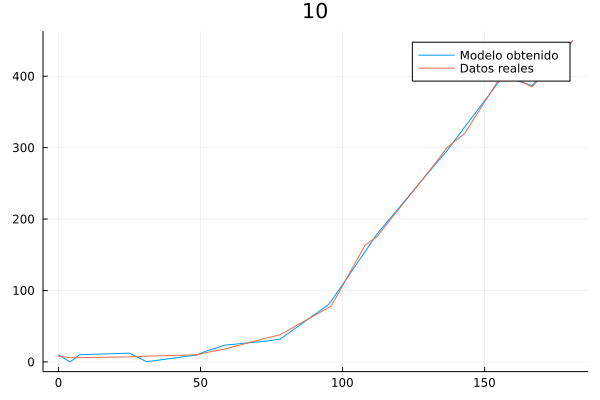

In [142]:
# Este dato lo puede cambiar el usuario. Es el grado del polinomio que 
# vamos a usar para ajustar
n = 10
g = PolyModel(n,t,y)

geval = g.(t)
ytest = t 

#p1 = plot(t,geval)
#p2 = plot(t,y)

#plot!(p1,t,y)
#plot(t,ytest)

plot(t,[g,y], title =  n, label=["Modelo obtenido" "Datos reales" ] )

In [106]:
geval

20-element Vector{Float64}:
   8.878205648192594
   5.670892387904913
   4.581328640493643
   7.7860358282035484
   9.07263897748965
  11.612858837962037
  12.397514700363136
  14.992845290752996
  28.759365189615284
  37.958495216488515
  86.93682628734314
  90.80389654767612
 145.23367757973398
 166.21894856801975
 284.6382616924052
 304.3316082025949
 333.89904114651836
 379.1223598526303
 398.7563147569799
 448.3488846486907